# Histopathologic Cancer Detection - Mini Project

## Introduction - Binary image classification problem
The main goal of this project is to develop a Convolutional Neural Network (CNN) prediction model that is capable of binary classification of histopathological images in dataset as containing metastatic cancer tissue or not. The primary goal is to create and finetune a CNN model using keras to identify metastatic cancer in small image patches from digital pathology scans. Analyze the model performance against test and validation dataset and present results in an easy to understand format.

## Problem Statement
The core problem is to classify microscopic images into one of two categories: 'contains metastatic cancer tissue' (positive class) or 'does not contain metastatic cancer tissue' (negative class). Given a large dataset of 96×96 pixel image patches from histological scans, the objective is to build a high-performing Convolutional Neural Network (CNN) model using Keras that can generalize well to unseen images. A successful model would serve as a valuable tool for preliminary screening and assisting pathologists in their diagnostic workflow.

## Data Description
 
 The dataset includes a large collection of digitized biopsy image files stored in train and test folders. Each image is a small patch (96 X 96 pixels) extracted from a larger histopathology scan. Lables are provided in train_labels.csv file which labels each image file in train folder with a binary label: 1 if it contains cancer, and 0 if it does not.

## Exploratory Data Analysis (EDA)
- Display sample images from each class.
- Visualize class distribution.
- Check for missing data.

In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DATA_DIR = '../data'
LABELS_PATH = '../data/train_labels.csv'

### Inspect Data

In [22]:

# Basic EDA 
labels_df = pd.read_csv(LABELS_PATH)
# labels_df.info()

print("columns in the dataset")
print(labels_df.columns)

print(f"Value counts of labels")
print(labels_df['label'].value_counts())

# Check if there are any null values in the dataset; there should be none
print(f"Null values in the dataset")
print(labels_df.isnull().sum())

print("Sample Label Data")
labels_df.head(10)




columns in the dataset
Index(['id', 'label'], dtype='object')
Value counts of labels
label
0    130908
1     89117
Name: count, dtype: int64
Null values in the dataset
id       0
label    0
dtype: int64
Sample Label Data


,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
5,acfe80838488fae3c89bd21ade75be5c34e66be7,0
6,a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da,1
7,7f6ccae485af121e0b6ee733022e226ee6b0c65f,1
8,559e55a64c9ba828f700e948f6886f4cea919261,0
9,8eaaa7a400aa79d36c2440a4aa101cc14256cda4,0


### Visualize Label Data

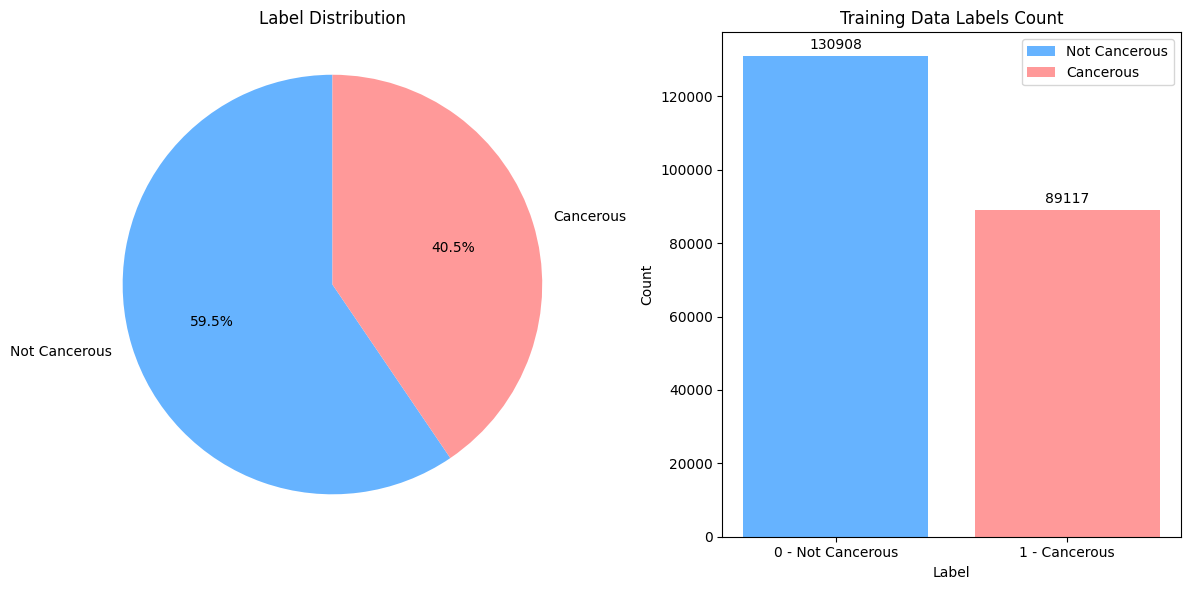

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# Pie chart
axes[0].pie(
    labels_df['label'].value_counts(),
    labels=['Not Cancerous', 'Cancerous'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)
axes[0].set_title('Label Distribution')
axes[0].axis('equal')

# Bar chart
bar1 = axes[1].bar('0 - Not Cancerous', len(labels_df[labels_df['label'] == 0]), color='#66b3ff')
bar2 = axes[1].bar('1 - Cancerous', len(labels_df[labels_df['label'] == 1]), color='#ff9999')
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Count")
axes[1].set_title("Training Data Labels Count")
axes[1].legend(['Not Cancerous', 'Cancerous'])

# Add data labels on bars
for bar in bar1 + bar2:
    height = bar.get_height()
    axes[1].annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Visualize Image Samples

/var/folders/fk/00ns88w11d730txg0s1d70140000gn/T/ipykernel_26232/810584970.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples = labels_df.groupby('label').apply(lambda x: x.sample(10, random_state=42), include_groups=True).reset_index(drop=True)


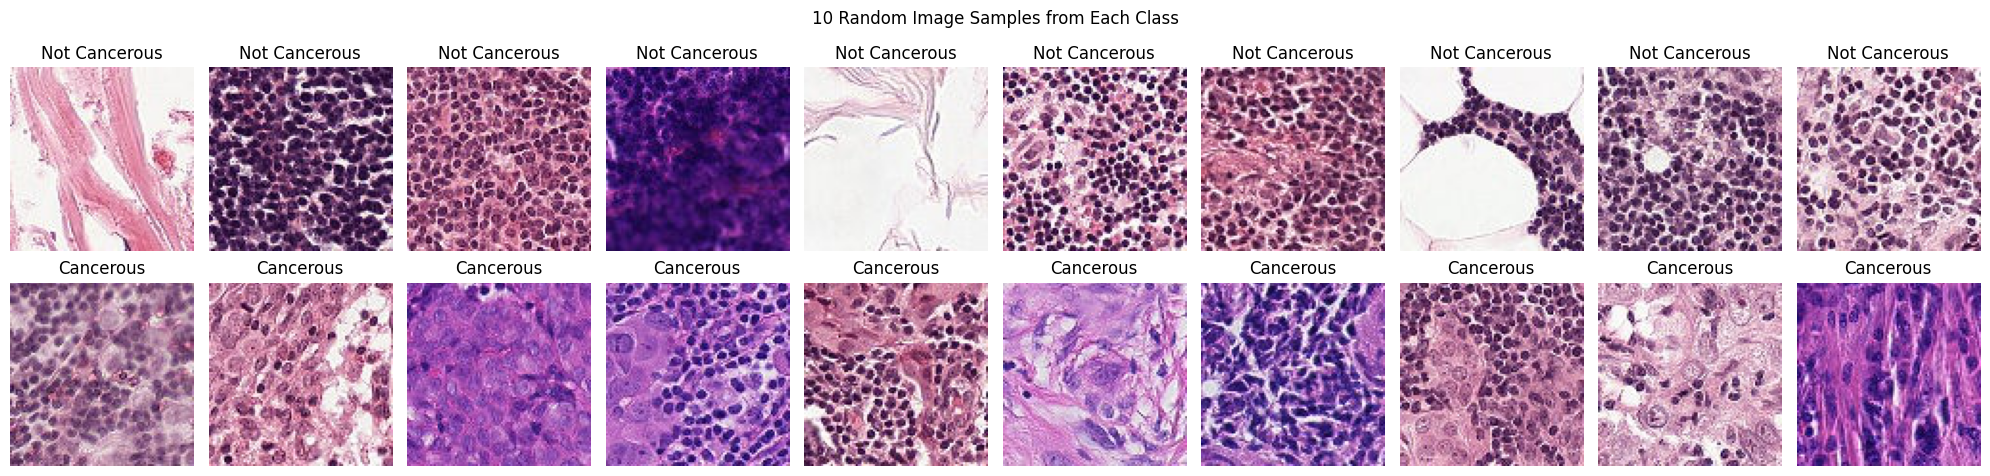

In [43]:
# Load and display 10 random sample image from each class from train folder
from PIL import Image
  
# Path to train image folder
train_dir = DATA_DIR + '/train' 

# Sample 10 images from each class
samples = labels_df.groupby('label').apply(lambda x: x.sample(10, random_state=42), include_groups=True).reset_index(drop=True)

# Plot
fig, axes = plt.subplots(2, 10, figsize=(20, 5))
for i, (idx, row) in enumerate(samples.iterrows()):
    img_path = os.path.join(train_dir, row['id'] + '.tif')
    img = Image.open(img_path)
    ax = axes[row['label'], i % 10]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"{'Cancerous' if row['label'] == 1 else 'Not Cancerous'}")
plt.suptitle('10 Random Image Samples from Each Class')
plt.tight_layout()
plt.show()

### Data Preprocessing and Analysis Strategy
As seen in EDA, data is fairly clean. But few steps are needed before making the model
 - No null removals is needed. 
 - Reduce the datasize to 50000 randomly selected labels to speed up model training.
 - Create Train/Validation data split.  
 - Add image paths to training and test dataframes. 
 - Create image generators to feed data to model for learning

Note: The machine used to create this project do not have supported GPU with tensorflow so the training is done using regular CPU. For this reason the datasize is reduced.

In [46]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Reduce the datasize to 50000 randomly selected labels to speed up model training.
sample_size = 50000

sample_labels_df = labels_df.sample(n=sample_size, random_state=42)

#Create Train/Validation data split.
train_df, val_df = train_test_split(sample_labels_df, test_size=0.2, stratify=sample_labels_df['label'], random_state=42)

print(f'Train size: {len(train_df)}, Validation size: {len(val_df)}')


def get_image_path(image_id):
    return os.path.join(DATA_DIR, 'train', f"{image_id}.tif")

# Add a file path column with full image paths
train_df['path'] = train_df['id'].apply(get_image_path)
val_df['path'] = val_df['id'].apply(get_image_path)


# Image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


# Custom generator using flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(64, 64),
    color_mode='rgb',
    class_mode='raw',
    batch_size=128,
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='label',
    target_size=(64, 64),
    color_mode='rgb',
    class_mode='raw',
    batch_size=128,
    shuffle=False
)



Train size: 40000, Validation size: 10000
Found 40000 validated image filenames.
Found 10000 validated image filenames.


### Model Architecture and Building

For this project we will create 2 different models.

#### Model 1: Basic CNN 
This is a lightweight CNN architecture designed with a single convolutional layer followed by max pooling and a small fully connected layer. It is intended to serve as a quick baseline model, particularly useful in low-resource environments or for debugging the training pipeline:
##### Architecture

1. **Input Layer**: 
   - Accepts images of size \( H X W X C \) (e.g.,  64 X 64 X 3) for 64x64 RGB images.

2. **Convolutional Layer**:
   - **Filters**: 32
   - **Kernel Size**: \( 3 X 3 \)
   - **Activation Function**: ReLU
   - **Padding**: Same (to maintain spatial dimensions)
   - **Output Shape**: \( H X W X 32 \)

3. **Max Pooling Layer**:
   - **Pool Size**: \( 2 X 2 \)
   - **Stride**: 2
   - **Purpose**: Reduce spatial dimensions by half and extract dominant features
   - Greatly reduces the number of parameters compared to Flatten

4. **Global Average Pooling Layer** (`GlobalAveragePooling2D`)  
   - **Purpose**: Replaces `Flatten()`  
   - Computes the **average of each feature map**, resulting in a **1D vector of size equal to the number of filters** 
   

5. **Fully Connected Layer**:
   - **Units**: 64
   - **Activation Function**: ReLU
   - Learns complex feature combinations from the pooled vector

6. **Output Layer**:
   - **Units**: Number of classes (e.g., for CIFAR-10, use 10)
   - **Activation Function**: Softmax (for multi-class classification)

7. **Output Layer**  
   - **Units**: 1  
   - **Activation**: Sigmoid  
   - Outputs the probability of the positive class (e.g., cancer presence)

#### Model 2: Deep CNN 
This model introduces some enhancements to basic CNN model by adding **a second convolutional block**, enabling deeper feature extraction. It is still relatively lightweight but offers significantly more **representation capacity**. 

#### Architecture

1. **Input Layer**: 
   - Accepts images of size \( H X W X C \) (e.g.,  64 X 64 X 3) for 64x64 RGB images.

2. **First Convolutional Layer**:
   - **Filters**: 32
   - **Kernel Size**: \( 3 X 3 \)
   - **Activation Function**: ReLU
   - **Padding**: Same (to maintain spatial dimensions)

3. **First Max Pooling Layer**  
   - **Pool Size**: \( 2 X 2 \)
   - **Stride**: 2
   - **Purpose**: Reduce spatial dimensions by half and extract dominant features
   - Greatly reduces the number of parameters compared to Flatten

4. **Second Convolutional Layer**  
   - **Filters**: 32  
   - **Kernel Size**: \(3 X 3\)  
   - **Activation**: ReLU  
   - **Padding**: `'same'`  

5. **Second Max Pooling Layer**  
   - **Pool Size**: \(2 X 2\)  
   - Reduces spatial dimensions to \((H/4 X W/4 X 32)\)

6. **Flatten Layer**  
   - Converts the 3D feature map to a 1D vector for dense layers  
   - **Output Shape**: Depends on input resolution; e.g., for 64×64 input → \((None, 16×16×32) = (8192,)\)

7. **Fully Connected (Dense) Layer**  
   - **Units**: 64  
   - **Activation**: ReLU  
   - Learns high-level representations and combines spatial features

8. **Dropout Layer**  
   - **Rate**: 0.3  
   - Regularizes the model by preventing over-reliance on specific neurons

9. **Output Layer**  
   - **Units**: 1  
   - **Activation**: Sigmoid  
   - Outputs the probability of the positive class (binary classification)






### Model Building with Keras and Summary of Parameters

In [ ]:
# Example: Simple CNN with Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.optimizers import Adam


def simple_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
        MaxPooling2D(2,2),
        GlobalAveragePooling2D(),
        Flatten(),       
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

def deep_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
        MaxPooling2D(2,2),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model


model_grid = [
    {'model': simple_cnn,'model_name':'Basic CNN'},
    {'model': deep_cnn, 'model_name':'Deep CNN'},
]

#Display Model Summaries
for item in model_grid:
    model = item['model']()
    print(f"Summary for {item['model_name']}")
    model.summary()

Summary for Basic CNN


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Summary for Deep CNN


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,681 (1.57 MB)

 Trainable params: 411,681 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

#### Basic CNN Model Training and Hyperparameter Tuning
In this section, we train the **Basic CNN** and evaluate its performance across different learning rates. The goal is to analyze how the learning rate affects the convergence behavior and final validation accuracy of the model. We use the **Adam optimizer**, which adapts the learning rate during training, but we initialize it with two different values to test their influence.

Plots for Accuracy and Loss are presented for different learning rates.


/Users/ajaygupta/Documents/MSCS_Codebase/Machine Learning/Deep Learning/CNN/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 256ms/step - accuracy: 0.5720 - loss: 0.6729 - val_accuracy: 0.6227 - val_loss: 0.6142
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 281ms/step - accuracy: 0.7224 - loss: 0.5724 - val_accuracy: 0.7699 - val_loss: 0.4957
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 116s 370ms/step - accuracy: 0.7741 - loss: 0.4918 - val_accuracy: 0.7831 - val_loss: 0.4738
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 98s 313ms/step - accuracy: 0.7817 - loss: 0.4819 - val_accuracy: 0.7903 - val_loss: 0.4673
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 343ms/step - accuracy: 0.7829 - loss: 0.4769 - val_accuracy: 0.7935 - val_loss: 0.4619
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 353ms/step - accuracy: 0.7869 - loss: 0.4733 - val_accuracy: 0.7880 - val_loss: 0.4616
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 116s 370ms/step - accuracy: 0.7871 - loss: 0.4681 - val_accuracy: 0.7909 - val_loss: 0.4650
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 136s 351ms/step - accuracy: 0.7924 - lo

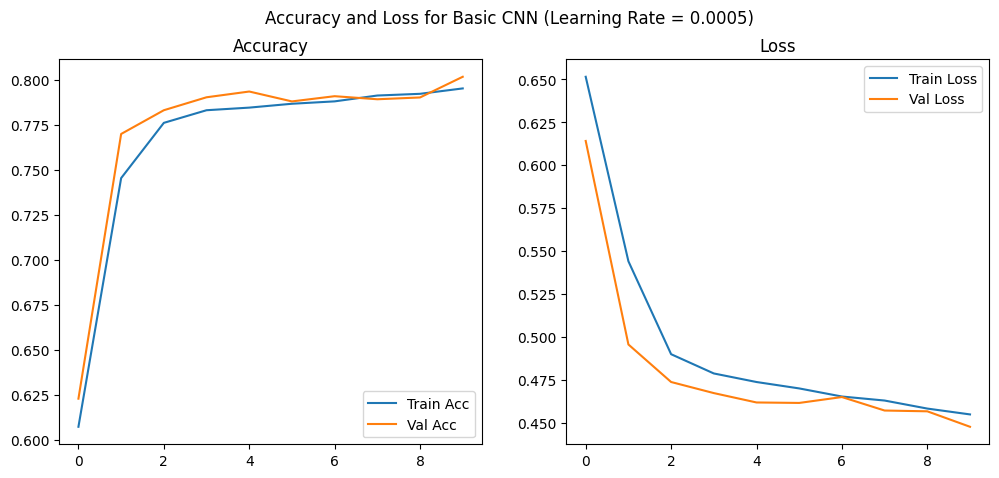

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 121s 378ms/step - accuracy: 0.7581 - loss: 0.5250 - val_accuracy: 0.7908 - val_loss: 0.4544
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 346ms/step - accuracy: 0.7881 - loss: 0.4673 - val_accuracy: 0.8051 - val_loss: 0.4398
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 358ms/step - accuracy: 0.7913 - loss: 0.4589 - val_accuracy: 0.7991 - val_loss: 0.4478
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 367ms/step - accuracy: 0.8000 - loss: 0.4446 - val_accuracy: 0.8108 - val_loss: 0.4209
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 362ms/step - accuracy: 0.8049 - loss: 0.4369 - val_accuracy: 0.8093 - val_loss: 0.4244
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 351ms/step - accuracy: 0.8053 - loss: 0.4358 - val_accuracy: 0.8041 - val_loss: 0.4255
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 105s 335ms/step - accuracy: 0.8032 - loss: 0.4353 - val_accuracy: 0.8056 - val_loss: 0.4277
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 359ms/step - accuracy: 0.8063 -

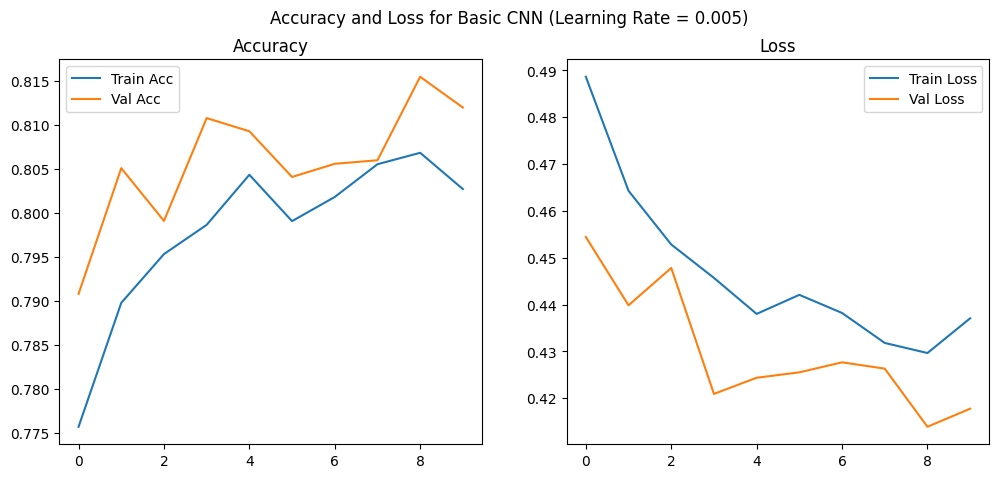

In [67]:
from keras.optimizers import Adam

results = []

basic_cnn = simple_cnn()

learning_rates = [0.0005, 0.005]

for C in learning_rates:
    basic_cnn.compile(optimizer=Adam(learning_rate=C), loss='binary_crossentropy', metrics=['accuracy'])
    history_basic_cnn =  basic_cnn.fit(
            train_generator,
            validation_data=val_generator,
            epochs=10,
            batch_size=128,
            verbose=1
        )
    val_loss, val_acc = basic_cnn.evaluate(val_generator)
    results.append({
        'Model': 'Basic CNN',
        'Batch Size': 128,
        "Learning Rate":C,
        'Optimizer': 'Adam',
        'Val Accuracy': val_acc,
        'Val Loss': val_loss
    })
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history_basic_cnn.history['accuracy'], label='Train Acc')
    plt.plot(history_basic_cnn.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history_basic_cnn.history['loss'], label='Train Loss')
    plt.plot(history_basic_cnn.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    plt.suptitle(f'Accuracy and Loss for Basic CNN (Learning Rate = {C})')
    plt.show()

#### Basic CNN Results

- As expected our basic CNN model training time was much quicker about 15 min for each iteration because low number of parameters.
- Basic CNN gave accuracy of 80% with 0.0005 learning rate and 81% with 0.005 learning rate respectively
- As you can see in plot for Basic CNN with 0.005 learning rate has high variation between train and validation set. So Lower learning rate mode should give better results.

#### Deep CNN Model Training and Hyperparameter Tuning - Batch Size 256, Epoch 10
In this section, we train the **Deep CNN** and evaluate its performance across different learning rates. The goal is to analyze how the learning rate affects the convergence behavior and final validation accuracy of the model. We use the **Adam optimizer**, which adapts the learning rate during training, but we initialize it with two different values to test their influence.

Plots for Accuracy and Loss are presented for different learning rates. 

/Users/ajaygupta/Documents/MSCS_Codebase/Machine Learning/Deep Learning/CNN/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 99s 310ms/step - accuracy: 0.7274 - loss: 0.5415 - val_accuracy: 0.7909 - val_loss: 0.4591 - learning_rate: 5.0000e-04
Epoch 2/10


/Users/ajaygupta/Documents/MSCS_Codebase/Machine Learning/Deep Learning/CNN/env/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 160s 509ms/step - accuracy: 0.7889 - loss: 0.4696 - val_accuracy: 0.7916 - val_loss: 0.4558 - learning_rate: 5.0000e-04
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 136s 435ms/step - accuracy: 0.7934 - loss: 0.4582 - val_accuracy: 0.8021 - val_loss: 0.4447 - learning_rate: 5.0000e-04
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 162s 516ms/step - accuracy: 0.7997 - loss: 0.4473 - val_accuracy: 0.8099 - val_loss: 0.4242 - learning_rate: 5.0000e-04
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 471ms/step - accuracy: 0.8009 - loss: 0.4394 - val_accuracy: 0.7848 - val_loss: 0.4573 - learning_rate: 5.0000e-04
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 445ms/step - accuracy: 0.8096 - loss: 0.4273 - val_accuracy: 0.8218 - val_loss: 0.4043 - learning_rate: 5.0000e-04
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 482ms/step - accuracy: 0.8171 - loss: 0.4104 - val_accuracy: 0.8195 - val_loss: 0.4100 - learning_rate: 5.0000e-04
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 447ms/

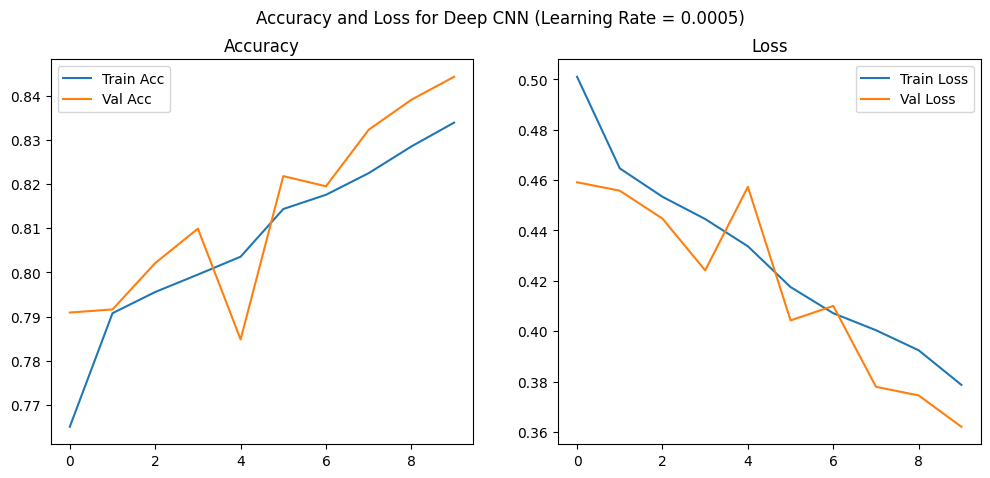

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 433ms/step - accuracy: 0.6513 - loss: 0.7670 - val_accuracy: 0.7639 - val_loss: 0.4893 - learning_rate: 0.0050
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 430ms/step - accuracy: 0.7649 - loss: 0.5019 - val_accuracy: 0.7842 - val_loss: 0.4727 - learning_rate: 0.0050
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 429ms/step - accuracy: 0.7768 - loss: 0.4828 - val_accuracy: 0.7714 - val_loss: 0.4785 - learning_rate: 0.0050
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 432ms/step - accuracy: 0.7774 - loss: 0.4861 - val_accuracy: 0.7927 - val_loss: 0.4588 - learning_rate: 0.0050
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 431ms/step - accuracy: 0.7865 - loss: 0.4749 - val_accuracy: 0.7825 - val_loss: 0.4591 - learning_rate: 0.0050
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 129s 413ms/step - accuracy: 0.7907 - loss: 0.4668 - val_accuracy: 0.7936 - val_loss: 0.4522 - learning_rate: 0.0050
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 118s 378ms/step - accura

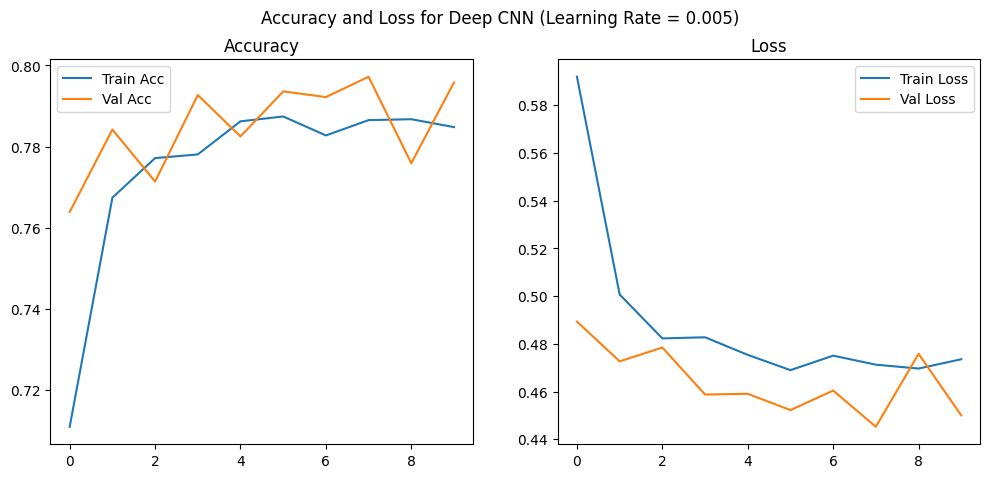

In [69]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

deep_cnn = deep_cnn()

learning_rates = [0.0005, 0.005]

for C in learning_rates:
    deep_cnn.compile(optimizer=Adam(learning_rate=C), loss='binary_crossentropy', metrics=['accuracy'])
    history_deep_cnn =  deep_cnn.fit(
            train_generator,
            validation_data=val_generator,
            epochs=10,
            batch_size=256,
            verbose=1,
            callbacks=[
                EarlyStopping(patience=3, restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2,verbose=1, mode='max', min_lr=0.00001)
            ]
        )
    val_loss, val_acc = deep_cnn.evaluate(val_generator)
    results.append({
        'Model': 'Deep CNN',
        'Batch Size': 256,
        "Learning Rate":C,
        'Optimizer': 'Adam',
        'Val Accuracy': val_acc,
        'Val Loss': val_loss
    })
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history_deep_cnn.history['accuracy'], label='Train Acc')
    plt.plot(history_deep_cnn.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history_deep_cnn.history['loss'], label='Train Loss')
    plt.plot(history_deep_cnn.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    plt.suptitle(f'Accuracy and Loss for Deep CNN (Learning Rate = {C})')
    plt.show()

#### Deep CNN with `batch_size=256` and `epoch=10` Results

- As expected our Deep CNN model training time was much lower than basic model about 25 min for each iteration because low number of parameters.
- Deep CNN gave accuracy of 84% with 0.0005 learning rate and 79% with 0.005 learning rate respectively. 
- As you can see in plot for Basic CNN with 0.005 learning rate has high variation between train and validation set. So Lower learning rate mode gave better accuracy and low low variation in train and validation set.
- Increase learning rate negatively affected the accuracy.

#### Deep CNN Model Training and Hyperparameter Tuning - Batch Size 126, Epoch 5
In this section, we train the **Deep CNN** with lower batchsize hyperparameter and smaller epoch size as well to see the how they affect the model performace. We also evaluate its performance across same learning rates of 0.0005 and 0.005 respecively. The goal is to analyze how various hyperparameters like `batch_size`, `learning_rate` and `epoch` affects the convergence behavior and final validation accuracy of the model. We use the same `Adam optimizer`, which adapts the learning rate during training, but we initialize it with two different values to test their influence.

Plots for Accuracy and Loss are presented for different learning rates. 

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 335ms/step - accuracy: 0.7948 - loss: 0.4579 - val_accuracy: 0.7975 - val_loss: 0.4409 - learning_rate: 5.0000e-04
Epoch 2/5


/Users/ajaygupta/Documents/MSCS_Codebase/Machine Learning/Deep Learning/CNN/env/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 482ms/step - accuracy: 0.7941 - loss: 0.4586 - val_accuracy: 0.7984 - val_loss: 0.4446 - learning_rate: 5.0000e-04
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 449ms/step - accuracy: 0.7977 - loss: 0.4516 - val_accuracy: 0.7993 - val_loss: 0.4392 - learning_rate: 5.0000e-04
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 154s 493ms/step - accuracy: 0.7956 - loss: 0.4544 - val_accuracy: 0.8015 - val_loss: 0.4380 - learning_rate: 5.0000e-04
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 465ms/step - accuracy: 0.7971 - loss: 0.4505 - val_accuracy: 0.7999 - val_loss: 0.4379 - learning_rate: 5.0000e-04
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - accuracy: 0.8031 - loss: 0.4346


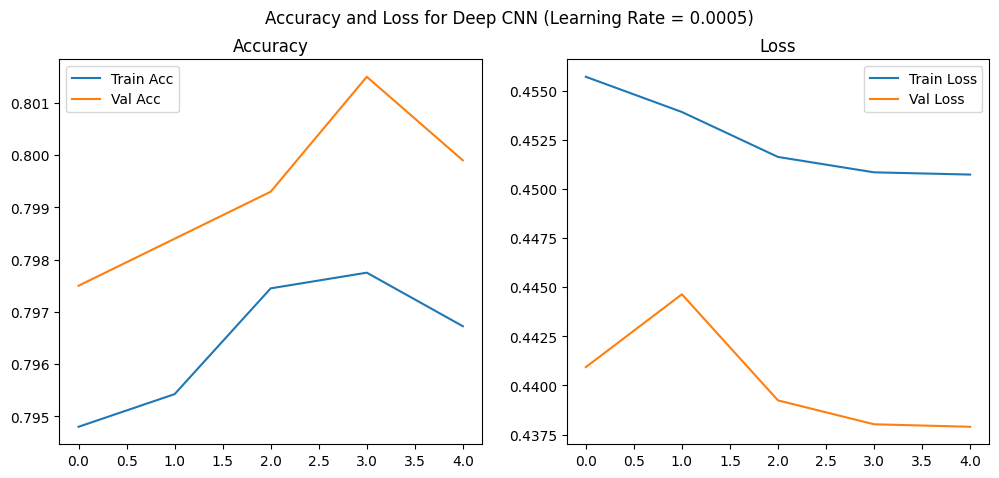

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 149s 469ms/step - accuracy: 0.7729 - loss: 0.5093 - val_accuracy: 0.7938 - val_loss: 0.4475 - learning_rate: 0.0050
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 154s 491ms/step - accuracy: 0.7915 - loss: 0.4612 - val_accuracy: 0.7901 - val_loss: 0.4743 - learning_rate: 0.0050
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 483ms/step - accuracy: 0.7896 - loss: 0.4671 - val_accuracy: 0.7990 - val_loss: 0.4458 - learning_rate: 0.0050
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 158s 506ms/step - accuracy: 0.7982 - loss: 0.4529 - val_accuracy: 0.7927 - val_loss: 0.4613 - learning_rate: 0.0050
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 161s 514ms/step - accuracy: 0.7939 - loss: 0.4588 - val_accuracy: 0.7991 - val_loss: 0.4446 - learning_rate: 0.0050
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 222ms/step - accuracy: 0.7970 - loss: 0.4420


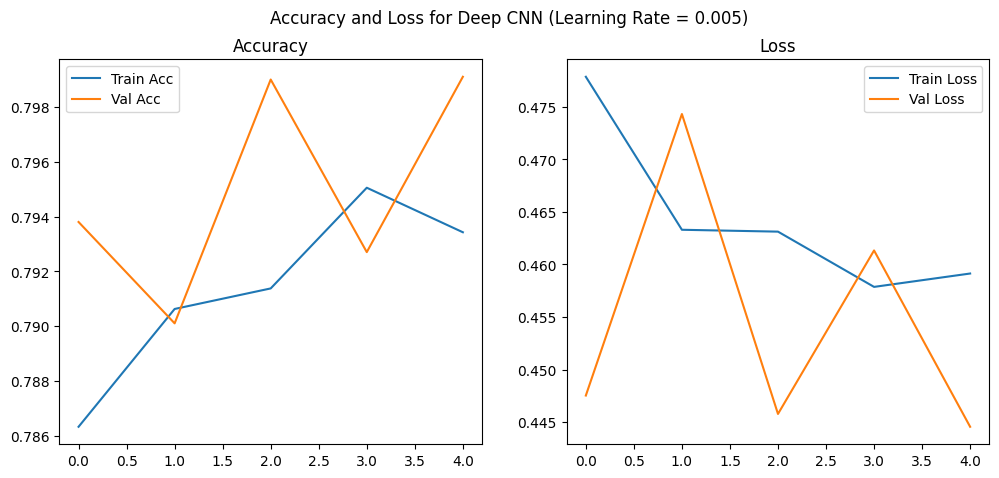

In [71]:
#Deep Model with smaller batch size and 5 epoch size

for C in learning_rates:
    deep_cnn.compile(optimizer=Adam(learning_rate=C), loss='binary_crossentropy', metrics=['accuracy'])
    history_deep_cnn =  deep_cnn.fit(
            train_generator,
            validation_data=val_generator,
            epochs=5,
            batch_size=128,
            verbose=1,
            callbacks=[
                EarlyStopping(patience=3, restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2,verbose=1, mode='max', min_lr=0.00001)
            ]
        )
    val_loss, val_acc = deep_cnn.evaluate(val_generator)
    results.append({
        'Model': 'Deep CNN with 5 Epoch',
        'Batch Size': 128,
        "Learning Rate":C,
        'Optimizer': 'Adam',
        'Val Accuracy': val_acc,
        'Val Loss': val_loss
    })
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history_deep_cnn.history['accuracy'], label='Train Acc')
    plt.plot(history_deep_cnn.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history_deep_cnn.history['loss'], label='Train Loss')
    plt.plot(history_deep_cnn.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    plt.suptitle(f'Accuracy and Loss for Deep CNN (Learning Rate = {C})')
    plt.show()

#### Deep CNN with `batch_size=128` and `epoch=5` Results

- Training time was much lower than basic model about 15 min for each iteration because low number of parameters.
- Lowering epoch size in Deep CNN gave negatively impacted accuracy and there was no convergence point. 
- As you can see in plot for Basic CNN with 0.005 learning rate has high variation between train and validation set. So Lower learning rate mode gave better accuracy and low low variation in train and validation set.
- Lowering Batch size definitely increase training time but may improve accuracy. In above experiment we reduced epoch length as well so training time was almost the same.

## Final Results

In [72]:
#Result summary for each  each model
results_df = pd.DataFrame(results)
display(results_df)

,Model,Batch Size,Learning Rate,Optimizer,Val Accuracy,Val Loss
0,Basic CNN,128,0.0005,Adam,0.8017,0.447733
1,Basic CNN,128,0.0050,Adam,0.8120,0.417764
2,Deep CNN,256,0.0005,Adam,0.8443,0.362023
3,Deep CNN,256,0.0050,Adam,0.7972,0.445238
4,Deep CNN with 5 Epoch,128,0.0005,Adam,0.7999,0.437896
5,Deep CNN with 5 Epoch,128,0.0050,Adam,0.7991,0.444566


The table above summarizes the validation accuracy and loss across different training configurations, including variations in model depth, batch size, learning rate, and number of epochs:

| Model                    | Batch Size | Learning Rate | Optimizer | Val Accuracy | Val Loss   |
|--------------------------|------------|----------------|-----------|--------------|------------|
| Basic CNN                | 128        | 0.0005         | Adam      | 0.8017       | 0.4477     |
| Basic CNN                | 128        | 0.0050         | Adam      | 0.8120       | 0.4178     |
| ✅ **Deep CNN (10 Epochs)**     | **256**        | **0.0005**         | **Adam**      | **0.8443**   | **0.3620** |
| Deep CNN (10 Epochs)     | 256        | 0.0050         | Adam      | 0.7972       | 0.4452     |
| Deep CNN (5 Epochs)      | 128        | 0.0005         | Adam      | 0.7999       | 0.4379     |
| Deep CNN (5 Epochs)      | 128        | 0.0050         | Adam      | 0.7991       | 0.4446     |

---

### Key Observations

#### **What Helped Improve Performance**

- **Model Depth**: The Deep CNN clearly outperformed the Basic CNN in validation accuracy, especially when trained for longer. The best-performing configuration (`Val Acc = 0.8443`) used the deep model with a longer training duration (10 epochs), highlighting the importance of **deeper architectures for learning hierarchical features** in complex image data like histopathology.

- **Smaller Learning Rate (0.0005)**: In almost every configuration, using a smaller learning rate improved validation accuracy. For example:
  - Deep CNN with LR = 0.0005 → **84.4%**
  - Deep CNN with LR = 0.005 → **79.7%**

  This suggests that a **lower learning rate helped the model converge more smoothly** to a better minimum.

---

#### **What Did Not Help or Hurt Performance**

- **Large Learning Rate (0.005)**: Higher learning rates led to **lower accuracy and higher loss** in the deeper models. This is likely because large updates caused the model to overshoot optimal weights — especially problematic with more parameters.

- **Larger Batch Size (256) with High LR**: Although larger batches typically stabilize gradients, when combined with a high learning rate (0.005), performance dropped (Val Acc = 0.7972). This configuration may have converged too quickly to a suboptimal point or oscillated during training.

- **Shorter Training (5 Epochs)**: Cutting training time to 5 epochs led to a noticeable dip in performance for the deep model, even with a smaller batch size. This indicates the model **did not have enough time to fully converge**, emphasizing the need for adequate training duration.


## Model Prediction and Kaggle Submission

In [74]:

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

test_dir = DATA_DIR + '/test' 

def get_test_dataframe():
    test_ids = [fname for fname in os.listdir(test_dir) if fname.endswith('.tif')]
    df = pd.DataFrame({'id': [fname.replace('.tif', '') for fname in test_ids]})
    df['filename'] = df['id'] + '.tif'
    return df

test_df = get_test_dataframe()

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='filename',
    y_col=None,
    target_size=(64, 64),
    color_mode='rgb',
    class_mode=None,
    batch_size=128,
    shuffle=False
)

preds = basic_cnn.predict(test_generator, verbose=1)

labels = (preds > 0.5).astype(int).flatten()

# Create submission DataFrame
submission = pd.DataFrame({'id': test_df['id'], 'label': labels})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")


Found 57458 validated image filenames.


/Users/ajaygupta/Documents/MSCS_Codebase/Machine Learning/Deep Learning/CNN/env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 72s 159ms/step
Submission file created: submission.csv
